In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#uploading file
from google.colab import files
uploaded=files.upload()

Saving Coachella-2015-2-DFE.csv to Coachella-2015-2-DFE.csv


In [ ]:
#reading the dataset
df=pd.read_csv("Coachella-2015-2-DFE.csv")

In [ ]:
df.head()

,index,coachella_sentiment,coachella_yn,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,0,positive,yes,kokombil,0,#Coachella2015 tickets selling out in less tha...,"[0.0, 0.0]",1/7/15 15:02,5.529630e+17,NaN,Quito
1,1,positive,yes,MisssTaraaa10,2,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...,NaN,1/7/15 15:02,5.529630e+17,united states,NaN
2,2,positive,yes,NMcCracken805,0,#Coachella2015 #VIP passes secured! See you th...,NaN,1/7/15 15:01,5.529630e+17,"Costa Mesa, CA",NaN
3,3,positive,yes,wxpnfm,1,PhillyÛªs @warondrugsjams will play #Coachell...,NaN,1/7/15 15:01,5.529630e+17,"Philadelphia, PA and Worldwide",Quito
4,4,positive,yes,Caesears,0,If briana and her mom out to #Coachella2015 i...,NaN,1/7/15 15:00,5.529630e+17,NaN,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3846 entries, 0 to 3845
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                3846 non-null   int64  
 1   coachella_sentiment  3846 non-null   object 
 2   coachella_yn         3846 non-null   object 
 3   name                 3846 non-null   object 
 4   retweet_count        3846 non-null   int64  
 5   text                 3846 non-null   object 
 6   tweet_coord          242 non-null    object 
 7   tweet_created        3846 non-null   object 
 8   tweet_id             3846 non-null   float64
 9   tweet_location       2676 non-null   object 
 10  user_timezone        2863 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 330.6+ KB


,index,retweet_count,tweet_id
count,3846.000000,3846.000000,3.846000e+03
mean,1922.500000,1.302912,5.526591e+17
std,1110.388896,11.873434,1.387891e+14
min,0.000000,0.000000,5.522590e+17
25%,961.250000,0.000000,5.525570e+17
50%,1922.500000,0.000000,5.525960e+17
75%,2883.750000,0.000000,5.527200e+17
max,3845.000000,485.000000,5.529630e+17


In [ ]:
df.columns

Index(['index', 'coachella_sentiment', 'coachella_yn', 'name', 'retweet_count',
       'text', 'tweet_coord', 'tweet_created', 'tweet_id', 'tweet_location',
       'user_timezone'],
      dtype='object')

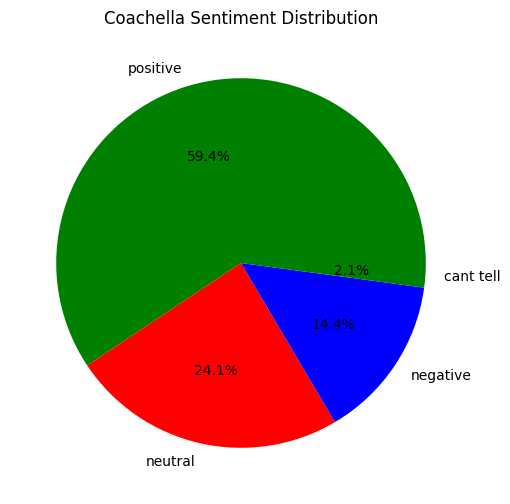

In [ ]:
sentiment_counts = df['coachella_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Coachella Sentiment Distribution')
plt.show()

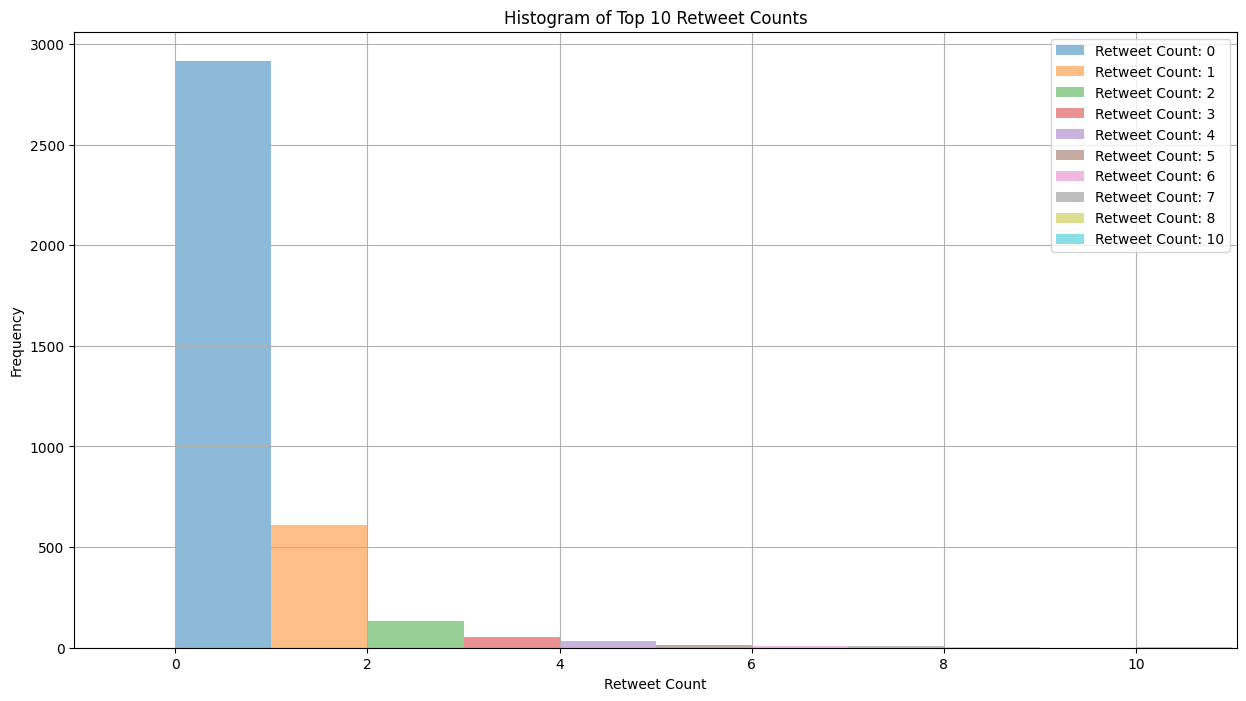

In [ ]:
top_counts = df['retweet_count'].value_counts().nlargest(10).index

# Create a single figure
fig, ax = plt.subplots(figsize=(15, 8))

# Plot histograms for each of the top 10 retweet counts
for count in top_counts:
    ax.hist(df[df['retweet_count'] == count]['retweet_count'], bins=30, alpha=0.5, label=f'Retweet Count: {count}', width=1)

# Set labels and title
ax.set_xlabel('Retweet Count')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Top 10 Retweet Counts')
ax.legend()
ax.grid(True)

plt.show()

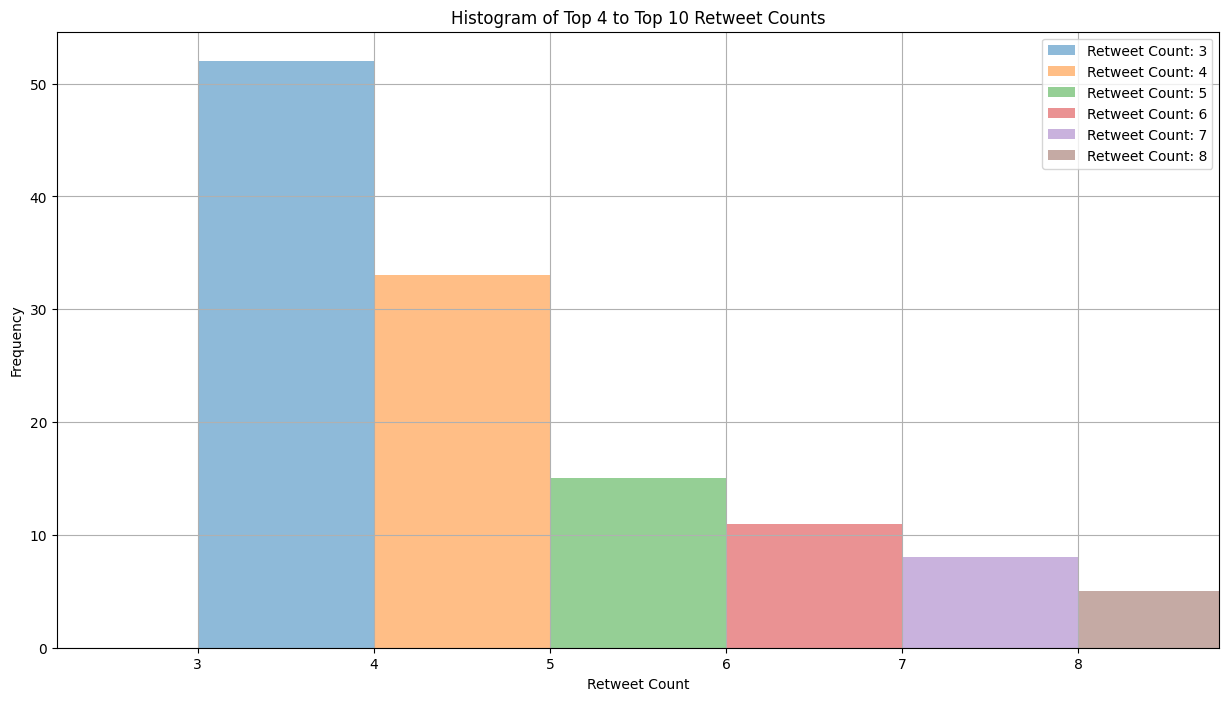

In [ ]:
top_counts = df['retweet_count'].value_counts().nlargest(10).index

# Slice the top_counts list to include only the top 4 to top 10 retweet counts
top_counts = top_counts[3:9]

# Create a single figure
fig, ax = plt.subplots(figsize=(15, 8))

# Plot histograms for each of the top 4 to top 10 retweet counts
for count in top_counts:
    ax.hist(df[df['retweet_count'] == count]['retweet_count'], bins=30, alpha=0.5, label=f'Retweet Count: {count}', width=1)

# Set labels and title
ax.set_xlabel('Retweet Count')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Top 4 to Top 10 Retweet Counts')
ax.legend()
ax.grid(True)

In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap
# Extract latitude and longitude from tweet_coord column
df['tweet_coord'] = df['tweet_coord'].str.strip('[]')
df[['latitude', 'longitude']] = df['tweet_coord'].str.split(',', expand=True).astype(float)

# Filter out NaN values
df = df.dropna(subset=['latitude', 'longitude'])

# Create a base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=2)

# Add heatmap layer
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=10).add_to(m)

# Save the map as an HTML file
m.save('heatmap.html')

# Display the map
m

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

df['tweet_coord'] = df['tweet_coord'].str.strip('[]')
df[['latitude', 'longitude']] = df['tweet_coord'].str.split(',', expand=True).astype(float)

# Filter out NaN values
df = df.dropna(subset=['latitude', 'longitude', 'coachella_sentiment'])

# Create separate dataframes for positive, negative, and neutral sentiments
positive_df = df[df['coachella_sentiment'] == 'positive']
negative_df = df[df['coachella_sentiment'] == 'negative']
neutral_df = df[df['coachella_sentiment'] == 'neutral']

# Create a base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=2)

# Add heatmap layers for each sentiment
heat_data_positive = [[row['latitude'], row['longitude']] for index, row in positive_df.iterrows()]
HeatMap(heat_data_positive, radius=10, gradient={0.4: 'green'}).add_to(m)

heat_data_negative = [[row['latitude'], row['longitude']] for index, row in negative_df.iterrows()]
HeatMap(heat_data_negative, radius=10, gradient={0.4: 'red'}).add_to(m)

heat_data_neutral = [[row['latitude'], row['longitude']] for index, row in neutral_df.iterrows()]
HeatMap(heat_data_neutral, radius=10, gradient={0.4: 'blue'}).add_to(m)

# Save the map as an HTML file
m.save('sentiment_heatmap.html')

# Display the map


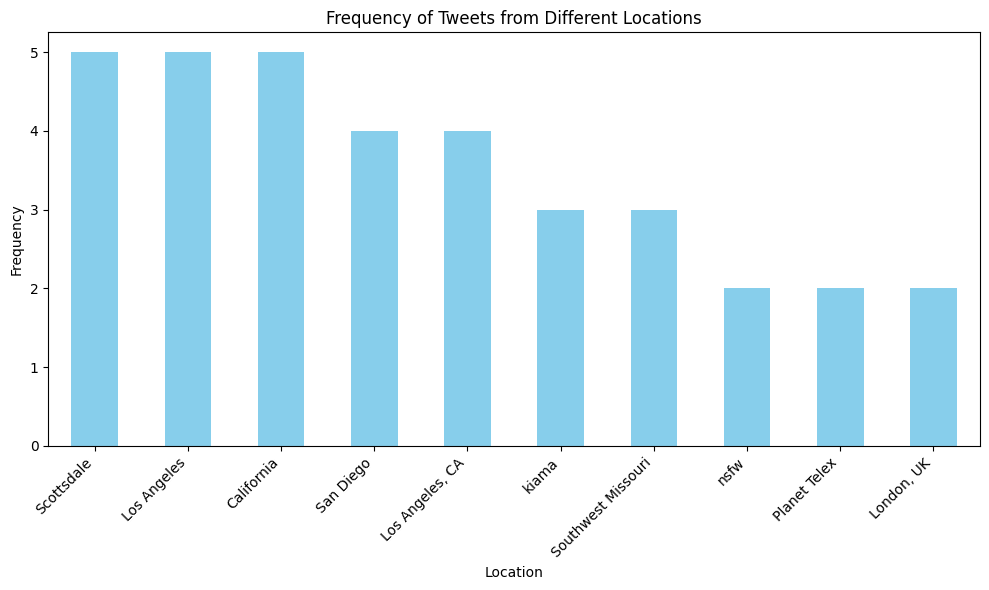

In [ ]:
# Filter out NaN values
df = df.dropna(subset=['tweet_location'])

# Get the frequency of tweets from each location
location_counts = df['tweet_location'].value_counts()

# Select top 10 locations
top_locations = location_counts.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='skyblue')
plt.title('Frequency of Tweets from Different Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df["tweet_location"].count()

197

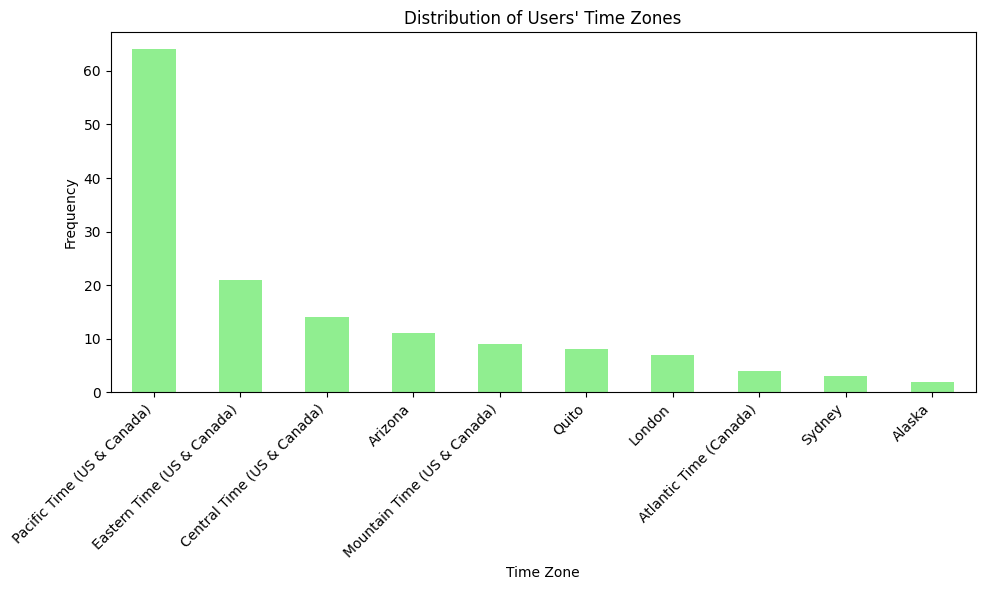

In [ ]:
# Filter out NaN values
df = df.dropna(subset=['tweet_location'])

# Get the frequency of tweets from each location
location_counts = df['tweet_location'].value_counts()

# Select top 10 locations
top_locations = location_counts.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='skyblue')
plt.title('Frequency of Tweets from Different Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-41-4a890b993855>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tweet_created'] = pd.to_datetime(df['tweet_created'])


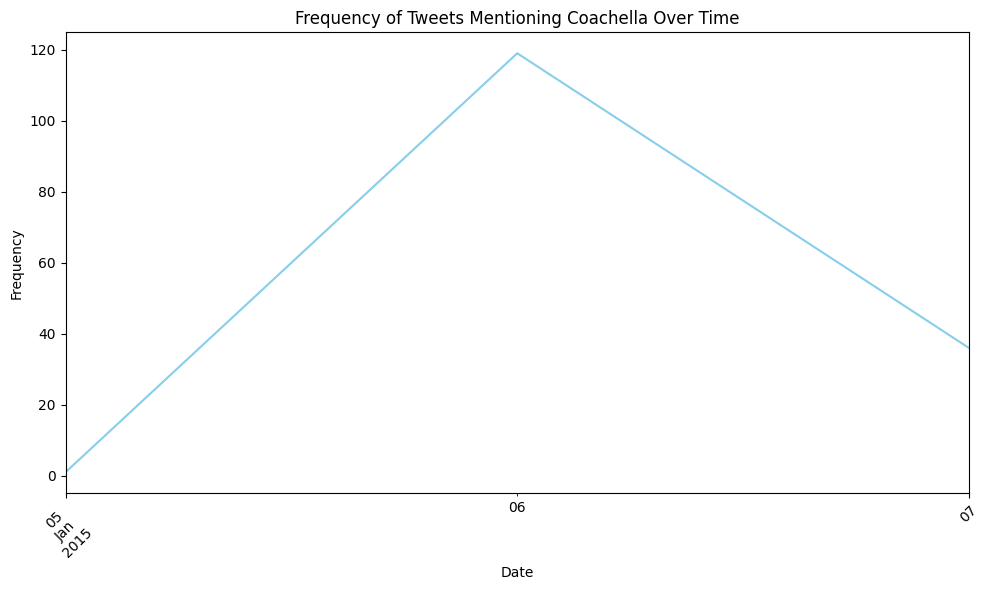

In [ ]:
# Convert 'tweet_created' column to datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Extract date and count the frequency of tweets mentioning Coachella
coachella_mentions = df.resample('D', on='tweet_created').size()

# Plot the line chart
plt.figure(figsize=(10, 6))
coachella_mentions.plot(color='skyblue')
plt.title('Frequency of Tweets Mentioning Coachella Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()